In [2]:
# Task-03
# Build a decision tree classifier to predict whether a customer will purchase a product or
# service based on their demographic and behavioral data.
# Use a dataset such as the Bank Marketing dataset from
# the UCI Machine Learning Repository.

import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("bank-additional-full.csv", delimiter=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isnull().sum()
# data has no null values 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Now we need to convert categorical data to numerical data to prepare it for training

In [5]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns=df.select_dtypes(include=['object']).columns
# df= pd.get_dummies(df,columns=categorical_columns, drop_first=True)

# # Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(df[categorical_columns]) # fit and trasformation

encoded_data

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

#  Combine the encoded columns with the original DataFrame (excluding the original categorical columns)
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [7]:
df.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df.columns  # After encoding 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [9]:
x=df.iloc[:,:-1]
y=df["y_yes"]


In [10]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train ,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [11]:
x_train.shape , y_train.shape 

((28831, 53), (28831,))

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)  # Initialization 
dtc.fit(x_train, y_train) # Train the dtc on the training data


DecisionTreeClassifier(random_state=42)

In [13]:
# Now Evaluation of Model
pred= dtc.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
# accuracy_score(y_test, pred)

dtc.score(x_test,y_test)         # Checking Accuracy score



0.8898599983814842

In [15]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8898599983814842
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     10968
         1.0       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



<function matplotlib.pyplot.show(close=None, block=None)>

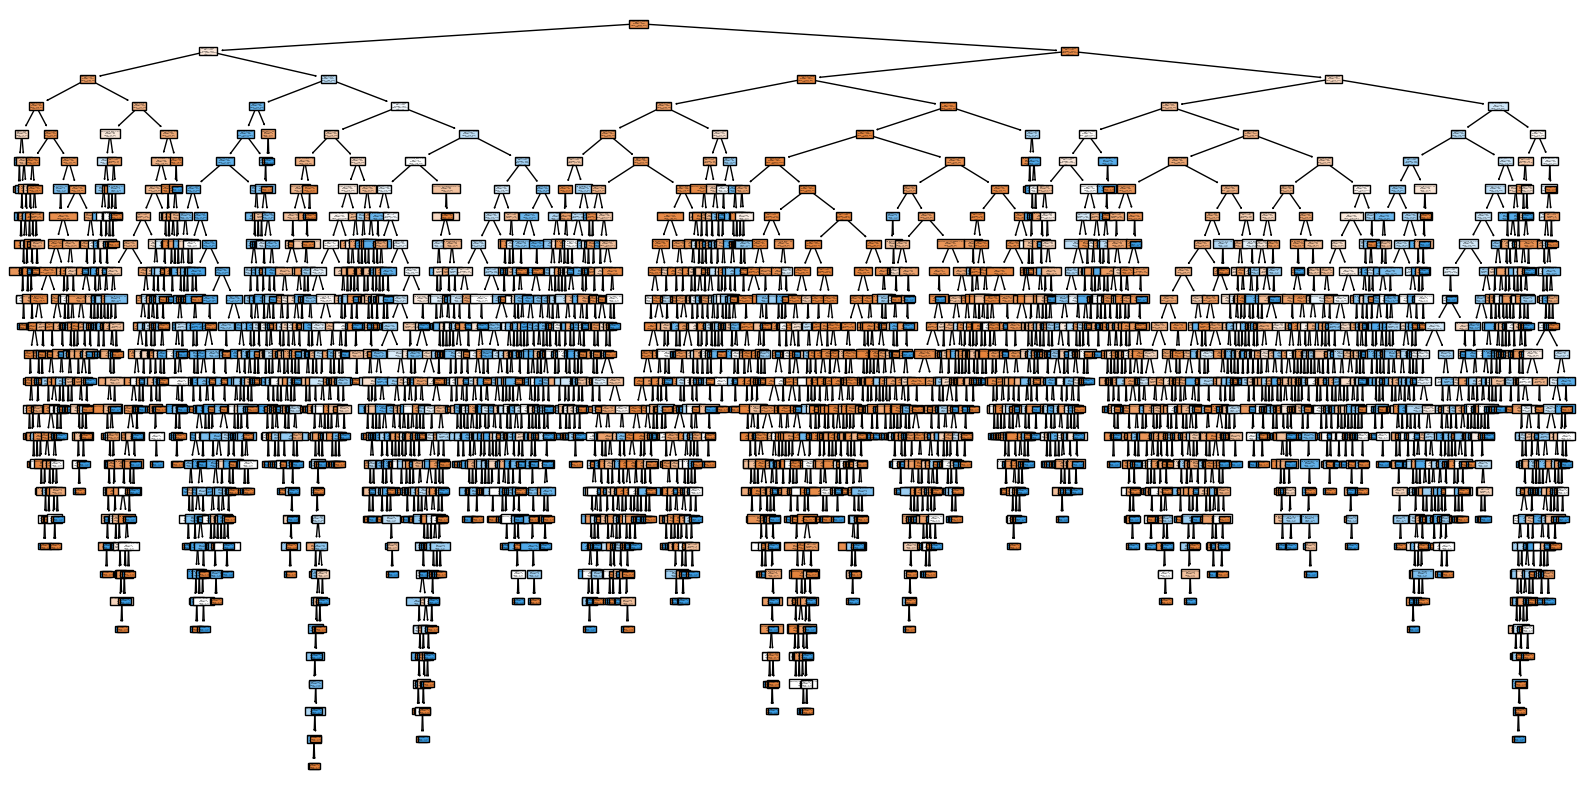

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dtc, filled=True, feature_names=x.columns  , class_names=['no','yes'])
plt.show




In [46]:
# Example of new input data (replace with actual values)
new_input = np.array([[45, 590, 2, 999, 0, 1.1, 93.994, -36.4, 4.857, 5191, 
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 
0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 
 0, 1, 0, 0, 0, 1]])  

# Predict the outcome
prediction = dtc.predict(new_input)
print("Predicted outcome:", "Yes" if prediction[0] == 1 else "No")


Predicted outcome: No


c:\Users\M YOUSAF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# We are checking the model on the data that already exists in the dataset for evaluation purposes


In [41]:
df_row = np.array([[44, 442, 1, 999, 0, -1.1, 94.767, -50.8, 1.028, 4963.6, 0.0, 0.0, 0.0, 0.0, 0.0, 
                  0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
                  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 
                  0.0, 0.0, 1.0, 0.0]])
prediction1=dtc.predict(df_row)
print("predicted outcome: ", "Yes" if prediction1[0]==1 else "No")


predicted outcome:  Yes


c:\Users\M YOUSAF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
